In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from feature_engine.creation import CyclicalFeatures

In [2]:
df = pd.read_csv('bank/bank-full.csv', sep=";")
print("First 10 rows of the dataset: \n", df.head(10))

First 10 rows of the dataset: 
    age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown 

In [3]:
print("Number of rows and columns in the dataset: ", df.shape)

Number of rows and columns in the dataset:  (45211, 17)


In [4]:
df.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [5]:
df_preprocessed = pd.DataFrame()

In [6]:
print("Analyzing the distribution of the target variable: \n\n", pd.crosstab(index=df['y'], columns='count'))

Analyzing the distribution of the target variable: 

 col_0  count
y           
no     39922
yes     5289


In [7]:
df_preprocessed['y'] = df['y'].apply(lambda x: 0 if x == 'no' else 1)
df_preprocessed['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [8]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
(df == 'unknown').sum().sort_values(ascending=False)

poutcome     36959
contact      13020
education     1857
job            288
month            0
previous         0
pdays            0
campaign         0
duration         0
age              0
day              0
loan             0
housing          0
balance          0
default          0
marital          0
y                0
dtype: int64

In [10]:
unknown_counts = (df == 'unknown').sum(axis=1)
unknown_counts.sort_values(ascending=False)

9456     4
10635    4
4750     4
9235     4
11269    4
        ..
29351    0
37857    0
29352    0
29353    0
45210    0
Length: 45211, dtype: int64

In [11]:
unknown_cols = ['poutcome', 'contact', 'education', 'job']
for col in unknown_cols:
    print(df[col].value_counts())

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


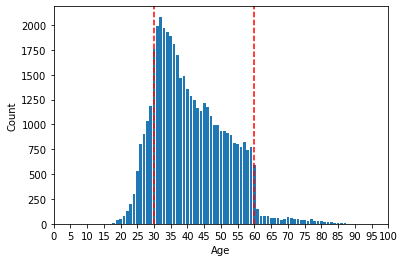

In [12]:
# Create the plot
fig, ax = plt.subplots()

# Plot the bar chart of age
ax.bar(df['age'].value_counts().index, df['age'].value_counts().values)

# Add the vertical lines at 30 and 60
ax.axvline(x=30, color='red', linestyle='--')
ax.axvline(x=60, color='red', linestyle='--')

# Set the x-axis label and tick marks
ax.set_xlabel('Age')
ax.set_xticks(range(0, 101, 5))

# Set the y-axis label and tick marks
ax.set_ylabel('Count')

# Show the plot
plt.show()

In [13]:
'''
# Define the conditions for the new column
conditions = [
    (df['age'] > 60),
    (df['age'] > 30),
    (df['age'] <= 30)
]

# Define the values for each condition
values = ['high', 'mid', 'low']

# Create the new column
df_preprocessed['age'] = np.select(conditions, values)

# Print the first few rows of the updated dataframe
print(df_preprocessed['age'].value_counts())
'''

"\n# Define the conditions for the new column\nconditions = [\n    (df['age'] > 60),\n    (df['age'] > 30),\n    (df['age'] <= 30)\n]\n\n# Define the values for each condition\nvalues = ['high', 'mid', 'low']\n\n# Create the new column\ndf_preprocessed['age'] = np.select(conditions, values)\n\n# Print the first few rows of the updated dataframe\nprint(df_preprocessed['age'].value_counts())\n"

In [14]:
# Create the new column
df_preprocessed['age'] = (df['age'] - df['age'].mean()) / df['age'].std()

In [15]:
ct_age = pd.crosstab(df_preprocessed['age'], df_preprocessed['y'])

# Print the contingency table
print("The below table tells the percentage of the people who subscribed or didn't based on the age group: \n", ct_age)

The below table tells the percentage of the people who subscribed or didn't based on the age group: 
 y           0   1
age              
-2.159970   5   7
-2.065797  24  11
-1.971624  35  15
-1.877451  57  22
-1.783279  89  40
...        ..  ..
 4.620481   0   2
 4.808827   0   2
 4.903000   0   2
 4.997173   1   0
 5.091346   1   1

[77 rows x 2 columns]


In [16]:
ct_job = pd.crosstab(df['job'], df['y'])
ct_job_percentage = pd.crosstab(df['job'], df['y'], normalize='index')
print("Sorted by counts: \n\n", ct_job.sort_values(by='yes', ascending=False))
print("Sorted by percentages: \n\n", ct_job_percentage.sort_values(by='yes', ascending=False))

Sorted by counts: 

 y                no   yes
job                      
management     8157  1301
technician     6757   840
blue-collar    9024   708
admin.         4540   631
retired        1748   516
services       3785   369
student         669   269
unemployed     1101   202
self-employed  1392   187
entrepreneur   1364   123
housemaid      1131   109
unknown         254    34
Sorted by percentages: 

 y                    no       yes
job                              
student        0.713220  0.286780
retired        0.772085  0.227915
unemployed     0.844973  0.155027
management     0.862444  0.137556
admin.         0.877973  0.122027
self-employed  0.881571  0.118429
unknown        0.881944  0.118056
technician     0.889430  0.110570
services       0.911170  0.088830
housemaid      0.912097  0.087903
entrepreneur   0.917283  0.082717
blue-collar    0.927250  0.072750


In [17]:
df_preprocessed['job'] = df['job']

In [18]:
ct_marital = pd.crosstab(df['marital'], df['y'], normalize='index')
ct_marital.sort_values(by='yes', ascending=False)

y,no,yes
marital,,
single,0.850508,0.149492
divorced,0.880545,0.119455
married,0.898765,0.101235


In [19]:
df_preprocessed['marital'] = df['marital']

In [20]:
ct_edu = pd.crosstab(df['education'], df['y'])
ct_edu_percentage = pd.crosstab(df['education'], df['y'], normalize='index')
print("Sorted by counts: \n", ct_edu.sort_values(by='yes', ascending=False))
print("\nSorted by percentages: \n", ct_edu_percentage.sort_values(by='yes', ascending=False))

Sorted by counts: 
 y             no   yes
education             
secondary  20752  2450
tertiary   11305  1996
primary     6260   591
unknown     1605   252

Sorted by percentages: 
 y                no       yes
education                    
tertiary   0.849936  0.150064
unknown    0.864297  0.135703
secondary  0.894406  0.105594
primary    0.913735  0.086265


In [21]:
df_preprocessed['education'] = df['education'].replace('unknown', 'secondary')
ct_edu = pd.crosstab(df_preprocessed['education'], df_preprocessed['y'])
ct_edu

y,0,1
education,,
primary,6260,591
secondary,22357,2702
tertiary,11305,1996


In [22]:
ct_default = pd.crosstab(df['default'], df['y'], normalize='index')
ct_default

y,no,yes
default,,
no,0.882039,0.117961
yes,0.936196,0.063804


In [23]:
ct_housing = pd.crosstab(df['housing'], df['y'], normalize='index')
ct_housing

y,no,yes
housing,,
no,0.832976,0.167024
yes,0.923000,0.077000


In [24]:
ct_loan = pd.crosstab(df['loan'], df['y'], normalize='index')
ct_loan

y,no,yes
loan,,
no,0.873443,0.126557
yes,0.933186,0.066814


In [25]:
df_preprocessed['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df_preprocessed['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df_preprocessed['default'] = df['default'].map({'yes': 1, 'no': 0})

In [26]:
ct_contact = pd.crosstab(df['contact'], df['y'], normalize='index')
ct_contact

y,no,yes
contact,,
cellular,0.850811,0.149189
telephone,0.865795,0.134205
unknown,0.959293,0.040707


In [27]:
ct_poutcome = pd.crosstab(df['poutcome'], df['y'])
ct_poutcome

y,no,yes
poutcome,,
failure,4283,618
other,1533,307
success,533,978
unknown,33573,3386


In [28]:
df_preprocessed['campaign'] = df['campaign']
df_preprocessed.loc[df_preprocessed['campaign'] <= 10, 'campaign'] = 0
df_preprocessed['campaign'] = (df_preprocessed['campaign'] - df_preprocessed['campaign'].mean())/ df_preprocessed['campaign'].std()
df_preprocessed

,y,age,job,marital,education,housing,loan,default,campaign
0,0,1.606947,management,married,tertiary,1,0,0,-0.15298
1,0,0.288526,technician,single,secondary,1,0,0,-0.15298
2,0,-0.747376,entrepreneur,married,secondary,1,1,0,-0.15298
3,0,0.571045,blue-collar,married,secondary,1,0,0,-0.15298
4,0,-0.747376,unknown,single,secondary,0,0,0,-0.15298
...,...,...,...,...,...,...,...,...,...
45206,1,0.947737,technician,married,tertiary,0,0,0,-0.15298
45207,1,2.831195,retired,divorced,primary,0,0,0,-0.15298
45208,1,2.925368,retired,married,secondary,0,0,0,-0.15298
45209,0,1.512774,blue-collar,married,secondary,0,0,0,-0.15298


In [29]:
ct_month = pd.crosstab(df['month'], df['y'], normalize='index')
ct_month

y,no,yes
month,,
apr,0.803206,0.196794
aug,0.889867,0.110133
dec,0.532710,0.467290
feb,0.833522,0.166478
jan,0.898788,0.101212
jul,0.909065,0.090935
jun,0.897772,0.102228
mar,0.480084,0.519916
may,0.932805,0.067195


In [30]:
df['month'].describe()

count     45211
unique       12
top         may
freq      13766
Name: month, dtype: object

<Axes: xlabel='month', ylabel='count'>

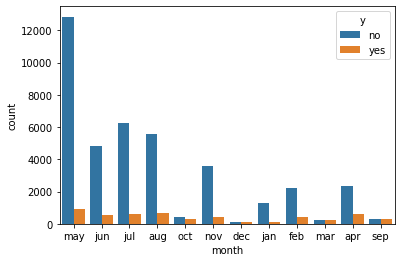

In [31]:
import seaborn as sns

sns.countplot(x='month', hue='y', data=df)

Text(0, 0.5, 'Percent')

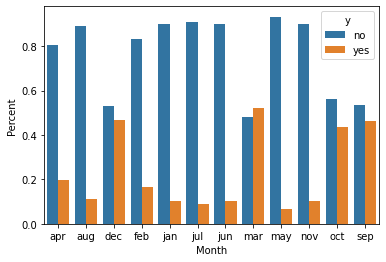

In [32]:
import seaborn as sns

month_table = pd.crosstab(df['month'], df['y'])
month_tab = month_table.apply(lambda r: r/r.sum(), axis=1)

month_tab = month_tab.reset_index()
month_tab = pd.melt(month_tab, id_vars=['month'], var_name='y', value_name='perc')
month_tab['y'] = month_tab['y'].astype('category')

sns.barplot(data=month_tab, x='month', y='perc', hue='y')
plt.xlabel('Month')
plt.ylabel('Percent')

In [33]:
df_preprocessed['month'] = df['month']

In [34]:
df['day'].describe()

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

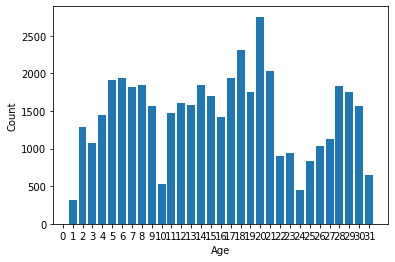

In [35]:
# Create the plot
fig, ax = plt.subplots()

# Plot the bar chart of age
ax.bar(df['day'].value_counts().index, df['day'].value_counts().values)

# Add the vertical lines at 30 and 60
#ax.axvline(x=30, color='red', linestyle='--')
#ax.axvline(x=60, color='red', linestyle='--')

# Set the x-axis label and tick marks
ax.set_xlabel('Age')
ax.set_xticks(range(0, 32, 1))

# Set the y-axis label and tick marks
ax.set_ylabel('Count')

# Show the plot
plt.show()

In [36]:
cyclical = CyclicalFeatures(variables=['day'], drop_original=True)
X = cyclical.fit_transform(df['day'].to_frame())
df_preprocessed = pd.concat([df_preprocessed, X], axis = 1)
df_preprocessed

,y,age,job,marital,education,housing,loan,default,campaign,month,day_sin,day_cos
0,0,1.606947,management,married,tertiary,1,0,0,-0.15298,may,0.848644,0.528964
1,0,0.288526,technician,single,secondary,1,0,0,-0.15298,may,0.848644,0.528964
2,0,-0.747376,entrepreneur,married,secondary,1,1,0,-0.15298,may,0.848644,0.528964
3,0,0.571045,blue-collar,married,secondary,1,0,0,-0.15298,may,0.848644,0.528964
4,0,-0.747376,unknown,single,secondary,0,0,0,-0.15298,may,0.848644,0.528964
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,0.947737,technician,married,tertiary,0,0,0,-0.15298,nov,-0.299363,-0.954139
45207,1,2.831195,retired,divorced,primary,0,0,0,-0.15298,nov,-0.299363,-0.954139
45208,1,2.925368,retired,married,secondary,0,0,0,-0.15298,nov,-0.299363,-0.954139
45209,0,1.512774,blue-collar,married,secondary,0,0,0,-0.15298,nov,-0.299363,-0.954139


In [37]:
'''
def categorize_days(day):
    if day <= 10:
        return 'beginning'
    elif day <= 20:
        return 'middle'
    else:
        return 'end'

# apply the categorize_days function to the day column
df_preprocessed['day_category'] = df['day'].apply(categorize_days)
'''

"\ndef categorize_days(day):\n    if day <= 10:\n        return 'beginning'\n    elif day <= 20:\n        return 'middle'\n    else:\n        return 'end'\n\n# apply the categorize_days function to the day column\ndf_preprocessed['day_category'] = df['day'].apply(categorize_days)\n"

In [38]:
#df_preprocessed['day_category'].hist()

In [39]:
#ct_day = pd.crosstab(df_preprocessed['day_category'], df_preprocessed['y'], normalize='index')
#ct_day

In [40]:
df['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [41]:
'''
df_preprocessed['duration'] = pd.cut(df['duration'], 
                                      bins=[0, 103, 180, 319, 4918], 
                                      labels=['Short', 'Medium', 'Long', 'Very long'])

ct_duration = pd.crosstab(df_preprocessed['duration'], df_preprocessed['y'], normalize='index')
ct_duration
'''

"\ndf_preprocessed['duration'] = pd.cut(df['duration'], \n                                      bins=[0, 103, 180, 319, 4918], \n                                      labels=['Short', 'Medium', 'Long', 'Very long'])\n\nct_duration = pd.crosstab(df_preprocessed['duration'], df_preprocessed['y'], normalize='index')\nct_duration\n"

In [42]:
df_preprocessed['duration'] = (df['duration'] - df['duration'].mean()) / df['duration'].std()

In [43]:
df_preprocessed

,y,age,job,marital,education,housing,loan,default,campaign,month,day_sin,day_cos,duration
0,0,1.606947,management,married,tertiary,1,0,0,-0.15298,may,0.848644,0.528964,0.011016
1,0,0.288526,technician,single,secondary,1,0,0,-0.15298,may,0.848644,0.528964,-0.416122
2,0,-0.747376,entrepreneur,married,secondary,1,1,0,-0.15298,may,0.848644,0.528964,-0.707353
3,0,0.571045,blue-collar,married,secondary,1,0,0,-0.15298,may,0.848644,0.528964,-0.645224
4,0,-0.747376,unknown,single,secondary,0,0,0,-0.15298,may,0.848644,0.528964,-0.233618
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,0.947737,technician,married,tertiary,0,0,0,-0.15298,nov,-0.299363,-0.954139,2.791298
45207,1,2.831195,retired,divorced,primary,0,0,0,-0.15298,nov,-0.299363,-0.954139,0.768216
45208,1,2.925368,retired,married,secondary,0,0,0,-0.15298,nov,-0.299363,-0.954139,3.373760
45209,0,1.512774,blue-collar,married,secondary,0,0,0,-0.15298,nov,-0.299363,-0.954139,0.970136


In [44]:
ct_previous = pd.crosstab(df['previous'], df['y'])
ct_previous.head()

y,no,yes
previous,,
0,33570,3384
1,2189,583
2,1650,456
3,848,294
4,543,171


In [45]:
def categorize_previous(previous):
    if previous == 0:
        return 'first_call'
    elif previous == 5:
        return '1_call'
    else:
        return '2+_calls'

# apply the categorize_days function to the day column
df_preprocessed['previous'] = df['previous'].apply(categorize_previous)
ct_previous = pd.crosstab(df_preprocessed['previous'], df_preprocessed['y'])
ct_previous

y,0,1
previous,,
1_call,338,121
2+_calls,6014,1784
first_call,33570,3384


In [46]:
ct_pdays = pd.crosstab(df['pdays'], df['y'])
ct_pdays.head()

y,no,yes
pdays,,
-1,33570,3384
1,9,6
2,35,2
3,1,0
4,1,1


In [47]:
def categorize_pdays(pdays):
    if pdays == -1:
        return -1
    else:
        return 1

df_preprocessed['pdays'] = df['pdays'].apply(categorize_pdays)
ct_pdays = pd.crosstab(df_preprocessed['pdays'], df_preprocessed['y'])
ct_pdays

y,0,1
pdays,,
-1,33570,3384
1,6352,1905


In [48]:
ct_balance = pd.crosstab(df['balance'], df['y'])
ct_balance
df_preprocessed['balance'] = ( df['balance'] - df['balance'].mean() )/ df['balance'].std()
df_preprocessed['balance']

0        0.256416
1       -0.437890
2       -0.446758
3        0.047205
4       -0.447086
           ...   
45206   -0.176458
45207    0.120445
45208    1.429577
45209   -0.228021
45210    0.528359
Name: balance, Length: 45211, dtype: float64

In [49]:
df_preprocessed

,y,age,job,marital,education,housing,loan,default,campaign,month,day_sin,day_cos,duration,previous,pdays,balance
0,0,1.606947,management,married,tertiary,1,0,0,-0.15298,may,0.848644,0.528964,0.011016,first_call,-1,0.256416
1,0,0.288526,technician,single,secondary,1,0,0,-0.15298,may,0.848644,0.528964,-0.416122,first_call,-1,-0.437890
2,0,-0.747376,entrepreneur,married,secondary,1,1,0,-0.15298,may,0.848644,0.528964,-0.707353,first_call,-1,-0.446758
3,0,0.571045,blue-collar,married,secondary,1,0,0,-0.15298,may,0.848644,0.528964,-0.645224,first_call,-1,0.047205
4,0,-0.747376,unknown,single,secondary,0,0,0,-0.15298,may,0.848644,0.528964,-0.233618,first_call,-1,-0.447086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,0.947737,technician,married,tertiary,0,0,0,-0.15298,nov,-0.299363,-0.954139,2.791298,first_call,-1,-0.176458
45207,1,2.831195,retired,divorced,primary,0,0,0,-0.15298,nov,-0.299363,-0.954139,0.768216,first_call,-1,0.120445
45208,1,2.925368,retired,married,secondary,0,0,0,-0.15298,nov,-0.299363,-0.954139,3.373760,2+_calls,1,1.429577
45209,0,1.512774,blue-collar,married,secondary,0,0,0,-0.15298,nov,-0.299363,-0.954139,0.970136,first_call,-1,-0.228021


In [50]:
df_preprocessed.describe(include='all')

,y,age,job,marital,education,housing,loan,default,campaign,month,day_sin,day_cos,duration,previous,pdays,balance
count,45211.000000,4.521100e+04,45211,45211,45211,45211.000000,45211.000000,45211.000000,4.521100e+04,45211,45211.000000,45211.000000,4.521100e+04,45211,45211.000000,4.521100e+04
unique,NaN,NaN,12,3,3,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,blue-collar,married,secondary,NaN,NaN,NaN,NaN,may,NaN,NaN,NaN,first_call,NaN,NaN
freq,NaN,NaN,9732,27214,25059,NaN,NaN,NaN,NaN,13766,NaN,NaN,NaN,36954,NaN,NaN
mean,0.116985,2.061959e-16,NaN,NaN,NaN,0.555838,0.160226,0.018027,4.274792e-17,NaN,0.027214,-0.106996,6.160730e-17,NaN,-0.634735,1.760208e-17
std,0.321406,1.000000e+00,NaN,NaN,NaN,0.496878,0.366820,0.133049,1.000000e+00,NaN,0.698901,0.706661,1.000000e+00,NaN,0.772739,1.000000e+00
min,0.000000,-2.159970e+00,NaN,NaN,NaN,0.000000,0.000000,0.000000,-1.529795e-01,NaN,-0.998717,-0.994869,-1.002467e+00,NaN,-1.000000,-3.081114e+00
25%,0.000000,-7.473762e-01,NaN,NaN,NaN,0.000000,0.000000,0.000000,-1.529795e-01,NaN,-0.651372,-0.758758,-6.025100e-01,NaN,-1.000000,-4.237673e-01
50%,0.000000,-1.823386e-01,NaN,NaN,NaN,1.000000,0.000000,0.000000,-1.529795e-01,NaN,-0.101168,-0.250653,-3.035132e-01,NaN,-1.000000,-3.002766e-01
75%,0.000000,6.652178e-01,NaN,NaN,NaN,1.000000,0.000000,0.000000,-1.529795e-01,NaN,0.724793,0.528964,2.362344e-01,NaN,-1.000000,2.158719e-02


In [51]:
le = LabelEncoder()

#df_preprocessed['age'] = pd.Categorical(df_preprocessed['age'], ordered=True, categories=['low', 'mid','high'])
#df_preprocessed['age'] = le.fit_transform(df_preprocessed['age'])

df_preprocessed['job'] = pd.Categorical(df_preprocessed['job'], ordered=True, categories=['blue-collar', 'services','entrepreneur', 'housemaid', 'self-employed','technician', 'management','admin.','unemployed', 'retired','student'])
df_preprocessed['job'] = le.fit_transform(df_preprocessed['job'])

df_preprocessed['marital'] = pd.Categorical(df_preprocessed['marital'], ordered=True, categories=['married', 'divorced', 'single'])
df_preprocessed['marital'] = le.fit_transform(df_preprocessed['marital'])

df_preprocessed['education'] = pd.Categorical(df_preprocessed['education'], ordered=True, categories=['primary','secondary', 'tertiary'])
df_preprocessed['education'] = le.fit_transform(df_preprocessed['education'])

df_preprocessed['month'] = pd.Categorical(df_preprocessed['month'], ordered=True, categories=['may', 'jul','jan', 'nov','jun', 'aug', 'feb','apr', 'oct','sep','dec','mar'])
df_preprocessed['month'] = le.fit_transform(df_preprocessed['month'])

#one_hot_col = pd.get_dummies(df_preprocessed['day_category'])
#df_preprocessed = df_preprocessed.join(one_hot_col)
#df_preprocessed = df_preprocessed.drop('day_category', axis=1)        

#df_preprocessed['duration'] = pd.Categorical(df_preprocessed['duration'], ordered=True, categories=['Short', 'Medium','Long', 'Very Long'])
#df_preprocessed['duration'] = le.fit_transform(df_preprocessed['duration'])

df_preprocessed['previous'] = pd.Categorical(df_preprocessed['previous'], ordered=True, categories=['first_call', '1_call','2+_calls'])
df_preprocessed['previous'] = le.fit_transform(df_preprocessed['previous'])

#df_preprocessed['pdays'] = df['pdays'].apply(lambda x: 0 if x == 'no' else 1)

df_preprocessed


,y,age,job,marital,education,housing,loan,default,campaign,month,day_sin,day_cos,duration,previous,pdays,balance
0,0,1.606947,4,1,2,1,0,0,-0.15298,8,0.848644,0.528964,0.011016,2,-1,0.256416
1,0,0.288526,9,2,1,1,0,0,-0.15298,8,0.848644,0.528964,-0.416122,2,-1,-0.437890
2,0,-0.747376,2,1,1,1,1,0,-0.15298,8,0.848644,0.528964,-0.707353,2,-1,-0.446758
3,0,0.571045,1,1,1,1,0,0,-0.15298,8,0.848644,0.528964,-0.645224,2,-1,0.047205
4,0,-0.747376,11,2,1,0,0,0,-0.15298,8,0.848644,0.528964,-0.233618,2,-1,-0.447086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,0.947737,9,1,2,0,0,0,-0.15298,9,-0.299363,-0.954139,2.791298,2,-1,-0.176458
45207,1,2.831195,5,0,0,0,0,0,-0.15298,9,-0.299363,-0.954139,0.768216,2,-1,0.120445
45208,1,2.925368,5,1,1,0,0,0,-0.15298,9,-0.299363,-0.954139,3.373760,1,1,1.429577
45209,0,1.512774,1,1,1,0,0,0,-0.15298,9,-0.299363,-0.954139,0.970136,2,-1,-0.228021


In [52]:
train_df, test_df = train_test_split(df_preprocessed, test_size=0.2)
print(train_df.shape, test_df.shape)
train_X = train_df.drop('y', axis=1)
train_X = (train_X - train_X.mean())/ train_X.std()
train_y = train_df['y']
print(train_X.head())
print(train_y.head())

(36168, 16) (9043, 16)
            age       job   marital  education   housing      loan   default  \
37226 -0.934784 -0.104217 -0.277200   1.308839  0.892430 -0.432929 -0.136018   
44670 -1.311123  1.119688  1.366908   1.308839  0.892430 -0.432929 -0.136018   
5816   1.699589  0.201759 -1.921308  -0.219823 -1.120505 -0.432929 -0.136018   
44461  0.382403 -0.104217 -0.277200  -0.219823 -1.120505 -0.432929 -0.136018   
16686  1.040996 -1.022146 -0.277200  -0.219823  0.892430 -0.432929 -0.136018   

       campaign     month   day_sin   day_cos  duration  previous     pdays  \
37226 -0.153194  0.819931  0.654356 -1.084954 -0.629707 -4.298116  2.114612   
44670 -0.153194  1.818638  0.777399  1.313405  0.666664 -1.919285  2.114612   
5816  -0.153194  0.819931 -1.254912  0.900547 -0.254340  0.459547 -0.472887   
44461 -0.153194 -1.510385  1.301945  0.643523  0.175204  0.459547 -0.472887   
16686 -0.153194 -0.178776 -1.455041  0.366382 -0.254340  0.459547 -0.472887   

        balance  
372

In [75]:
class LogisticRegression:
    
    def __init__(self, X, y, learningRate, reg_param, maxIteration, tolerance, index=None, lrtest=False):
        self.train_X = X
        self.train_y = y
        self.learningRate = learningRate
        self.reg_param = reg_param
        self.maxIteration = maxIteration
        self.tolerance = tolerance
        self.index = index
        self.lrtest = lrtest
   
    def addX0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])
        
    def sigmoid(self, z):
        sig = 1 / (1 + np.exp(-z))
        return sig
    
    def costFunction(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        loss = y * np.log(sig) + (1-y) * np.log(1 - sig)
        cost = - loss.sum()
        return cost
    
    def gradient(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig - y).dot(X)+ 2 * self.reg_param * self.w
        return grad
    
    def gradientDescent(self, X, y):
        losses = []
        prev_loss = float('inf')
        
        for i in tqdm(range(self.maxIteration), colour = 'red'):
            self.w = self.w - self.learningRate * self.gradient(X, y)
            current_loss = self.costFunction(X, y)
            diff_loss = np.abs(prev_loss - current_loss)
            losses.append(current_loss)
            
            if diff_loss < self.tolerance:
                print("The model stopped learning")
                break
                
            prev_loss = current_loss
            
        self.plot_cost(losses)
        
    def predict_train(self, X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)
    
    def predict(self, X):
        X = self.addX0(X)
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)
    
    def fit(self):
        self.train_X = self.addX0(self.train_X)
        self.w = np.ones(self.train_X.shape[1], dtype=np.float64)
        
        if self.index!=None:
            self.remove_index(self.index)
        
        print(self.train_X.shape)
        
        if self.lrtest == True:
            print("Finding the best Learning rate, solving using gradient descent")
            self.lr_test(self.train_X, self.train_y)
        
        else:
            print("Solving using gradient descent")
            self.gradientDescent(self.train_X, self.train_y)
            
            print("Evaluate the training results")
            y_hat_train = self.predict_train(self.train_X)
        
            recall, precision, f_score = self.evaluationFunction(self.train_y, y_hat_train)
            print("The recall of the model is {}".format(recall))
            print("The precision of the model is {}".format(precision))
            print("The F1 score of the model is {}".format(f_score))
        
            #self.plot()
            #self.scatterPlt()
            #self.plot3D()
        
    def lr_test(self, X, y):
        alphas = [0.1e-5, 0.5e-5, 0.1e-4, 0.5e-4, 0.1e-3, 0.5e-3, 0.1e-2, 0.01, 0.1]
        for lr in alphas:
            losses = []
            prev_loss = float('inf')
            for i in tqdm(range(self.maxIteration), colour = 'red'):
                self.w = self.w - lr * self.gradient(X, y)
                current_loss = self.costFunction(X, y)
                diff_loss = np.abs(prev_loss - current_loss)
                losses.append(current_loss)
            
                if diff_loss < self.tolerance:
                    print("The model stopped learning")
                    break
                
                prev_loss = current_loss
            
            self.plot_cost(losses)
            print("Evaluate the training results")
            y_hat_train = self.predict(self.train_X)
            print("Learning rate: ", lr)
            recall, precision, f_score = self.evaluationFunction(self.train_y, y_hat_train)
            print("The recall of the model is {}".format(recall))
            print("The precision of the model is {}".format(precision))
            print("The F1 score of the model is {}".format(f_score))
        
    def evaluationFunction(self, y, y_hat):
        
        y = (y==1)
        y_hat = (y_hat==1)
        
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        
        f_score = 2 * (precision * recall) / (precision + recall)
        
        return recall, precision, f_score
    
    def plot_cost(self, cost_sequence):
        #Data for plotting
        s = np.array(cost_sequence)
        t = np.arange(s.size)
        
        fig, ax = plt.subplots()
        ax.plot(t, s)
        
        ax.set(xlabel='iterations', ylabel='cost', title='cost trend')
        ax.grid()
        
        plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show()

(36168, 16)
Solving using gradient descent


100%|██████████| 1000/1000 [00:01<00:00, 586.09it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


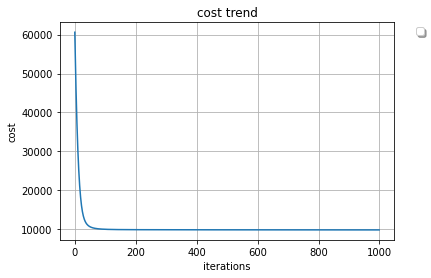

Evaluate the training results
The recall of the model is 0.21858179265153288
The precision of the model is 0.6029696578437702
The F1 score of the model is 0.32085194091377534
[-2.58723144  0.05977034  0.02940304  0.12629652  0.17960808 -0.55889095
 -0.21755487 -0.03556664 -0.11293561  0.02082978  0.03950381  0.05597054
  1.02471725  0.07949793  0.62802249  0.06251086]


In [76]:
clf = LogisticRegression(train_X, train_y, learningRate=0.00001, reg_param=0.00001, maxIteration=1000, tolerance=0.0001)
with tf.device('/device:GPU:0'):
    clf.fit()
print(clf.w)

In [77]:
test_X = test_df.drop('y', axis=1)
test_X = (test_X - test_X.mean()) / test_X.std()
test_y = test_df['y']
print(test_X.shape)

(9043, 15)


In [78]:
test_y_hat = clf.predict(test_X)
clf.evaluationFunction(test_y, test_y_hat)

(0.2283464566929134, 0.599483204134367, 0.33071988595866003)

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy', f1_m,precision_m, recall_m])

In [ ]:
with tf.device('/device:GPU:0'):
    model.fit(train_X, train_y, epochs=100, verbose=0)

In [ ]:
model.evaluate(test_X,test_y)

In [ ]:
# Import required libraries
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train the Decision Tree classifier
clf.fit(train_X, train_y)

# Predict the response for test dataset
y_pred = clf.predict(test_X)

# Calculate F1 score of the classifier
f1 = f1_score(test_y, y_pred, average='weighted')
print("F1 Score:", f1)

In [79]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score


# Create logistic regression classifier object
clf = LogisticRegression()

# Train the Decision Tree classifier
clf.fit(train_X, train_y)

# Predict the response for test dataset
y_pred = clf.predict(test_X)

# Calculate F1 score of the classifier
f1 = f1_score(test_y, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate accuracy of the classifier
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)

print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)
params = clf.get_params()
print("Hyperparameters:", params)

F1 Score: 0.8736342538820312
Accuracy: 0.8954992812119872
Coefficients: [[ 0.06015297  0.02985494  0.12776426  0.17931943 -0.55684702 -0.21684346
  -0.03546399 -0.11472481  0.02113236  0.03963873  0.05547089  1.02225959
  -0.13829213  0.40693801  0.06261014]]
Intercept: [-2.58241634]
Hyperparameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
# Import required libraries
from sklearn.naive_bayes import GaussianNB

# Create Naive Bayes classifier object
clf = GaussianNB()

# Train the Decision Tree classifier
clf.fit(train_X, train_y)

# Predict the response for test dataset
y_pred = clf.predict(test_X)

# Calculate F1 score of the classifier
f1 = f1_score(test_y, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate accuracy of the classifier
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)